### SENTIMENTAL ANALYSIS AND TOPIC MODELLING BASED ON WORLD MENTAL HEALTH TWEETS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk #natural language tool kit
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [109]:
A = pd.read_csv('G:\SRM\MHDS\My Projects\ML\Sentiment Analysis\Mental Health Project\Extracterd tweets\Data from 5-11\MH__rts.csv',encoding = 'latin')
B = pd.read_csv('G:\SRM\MHDS\My Projects\ML\Sentiment Analysis\Mental Health Project\Extracterd tweets\Data from 17-23\MH_rts.csv',encoding = 'latin')
df = pd.concat([A, B], ignore_index=True)
df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,quoted_status_permalink,quote_count,timestamp_ms,reply_count,filter_level,query,withheld_scope,withheld_copyright,withheld_in_countries,possibly_sensitive_appealable
0,2022-10-10 18:38:08,1.579459e+18,1579458762578198529,"Every breath, a breakthrough. In honor of #Wor...",False,195,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-10 23:47:04,1.579537e+18,1579536505881886720,@liamgallagher @TalkClubUK Im feeling good at...,False,147,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""http://twitter.com/download/iphone"" r...",1.579455e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-10-10 04:35:00,1.579247e+18,1579246579944460289,"This #WorldMentalHealthDay, recognize that men...",False,116,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""https://about.twitter.com/products/tw...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-10-11 13:09:37,1.579738e+18,1579738476291198977,RT @RingCentral: Today is RingCentrals quarte...,False,140,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""recent"", iso_language_code...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-10-11 13:09:36,1.579738e+18,1579738472788918273,RT @ftaw16_: A Tigrayan woman said that a sold...,False,139,"list(hashtags = list(text = NA, indices = list...","list(result_type = ""recent"", iso_language_code...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13622,2022-10-17 23:48:17,1.582074e+18,1582073530744987649,Join me in my free workshop to learn more: \n...,False,259,"list(hashtags = list(text = c(""raisinggreatkid...","list(iso_language_code = ""en"", result_type = ""...","<a href=""https://www.hootsuite.com"" rel=""nofol...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13623,2022-10-17 23:48:04,1.582073e+18,1582073472896770048,Slots available for next week. \n\nContact us ...,False,276,"list(hashtags = list(text = c(""CAMHS"", ""eating...","list(iso_language_code = ""en"", result_type = ""...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13624,2022-09-02 08:58:23,1.565542e+18,1565542123021438977,National Nutrition Week 2022: à®¤à¯à®à®¿à®¯ ...,False,205,"list(hashtags = list(text = c(""NationalNutriti...","list(iso_language_code = ""ta"", result_type = ""...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13625,2022-09-01 16:16:57,1.565290e+18,1565290105190748161,#à®¤à¯à®à®¿à®¯ à®à®à¯à®à®à¯à®à®¤à¯à®...,False,59,"list(hashtags = list(text = c(""à®¤à¯à®à®¿à®¯...","list(iso_language_code = ""ta"", result_type = ""...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'metadata', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'text', 'favorited_by', 'scopes', 'display_text_width',
       'quoted_status_permalink', 'quote_count', 'timestamp_ms', 'reply_count',
       'filter_level', 'query', 'withheld_scope', 'withheld_copyright',
       'withheld_in_countries', 'possibly_sensitive_appealable'],
      dtype='object')

In [111]:
df.dtypes

created_at                        object
id                               float64
id_str                             int64
full_text                         object
truncated                           bool
display_text_range                 int64
entities                          object
metadata                          object
source                            object
in_reply_to_status_id            float64
in_reply_to_status_id_str        float64
in_reply_to_user_id              float64
in_reply_to_user_id_str          float64
in_reply_to_screen_name           object
geo                               object
coordinates                       object
place                             object
contributors                     float64
is_quote_status                     bool
retweet_count                      int64
favorite_count                     int64
favorited                           bool
retweeted                           bool
possibly_sensitive                object
lang            

In [112]:
df['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
       '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
       '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="http://www.linkedin.com/" rel="nofollow">LinkedIn</a>',
       '<a href="https://app.sendible.com" rel="nofollow">Sendible</a>',
       '<a href="https://ifttt.com" rel="nofollow">IFTTT</a>',
       '<a href="https://www.echobox.com" rel="nofollow">Echobox</a>',
       '<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>',
       '<a href="https://orlo.tech" rel="nofollow">Orlo</a>',
       '<a href="https://buffer.com" rel="nofollow">Buffer</a>',
       '<a href="http://gainapp.com" rel="nofollow">Gain 

In [113]:
df['source'].value_counts()

<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                                             3925
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                  3153
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>                                2750
<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>                                                771
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>                                  352
                                                                                                                    ... 
<a href="https://www.twitter.com" rel="nofollow">uwf.london</a>                                                        1
<a href="https://www.childabusesurvivor.net" rel="nofollow">Survivors Network</a>                                      1
<a href="https://www.clickasnap.

In [114]:
df['source'].value_counts().nlargest(30)

<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                  3925
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>       3153
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>     2750
<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>                     771
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       352
<a href="https://buffer.com" rel="nofollow">Buffer</a>                                    280
<a href="https://sproutsocial.com" rel="nofollow">Sprout Social</a>                       229
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>         197
<a href="https://rafiki-app.herokuapp.com/api/v1/rafiki" rel="nofollow">101rafiki</a>     104
<a href="https://www.make.com" rel="nofollow">Make (formerly Integromat)</a>               88
<a href="https://www.later.com" rel="nofollow">LaterMedia</a

<AxesSubplot:>

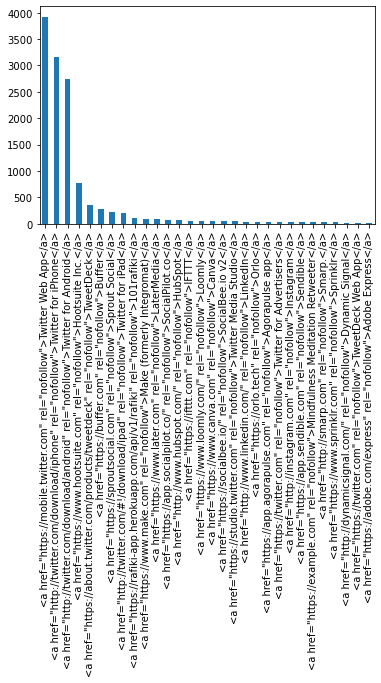

In [115]:
df['source'].value_counts().nlargest(30).plot(kind='bar')

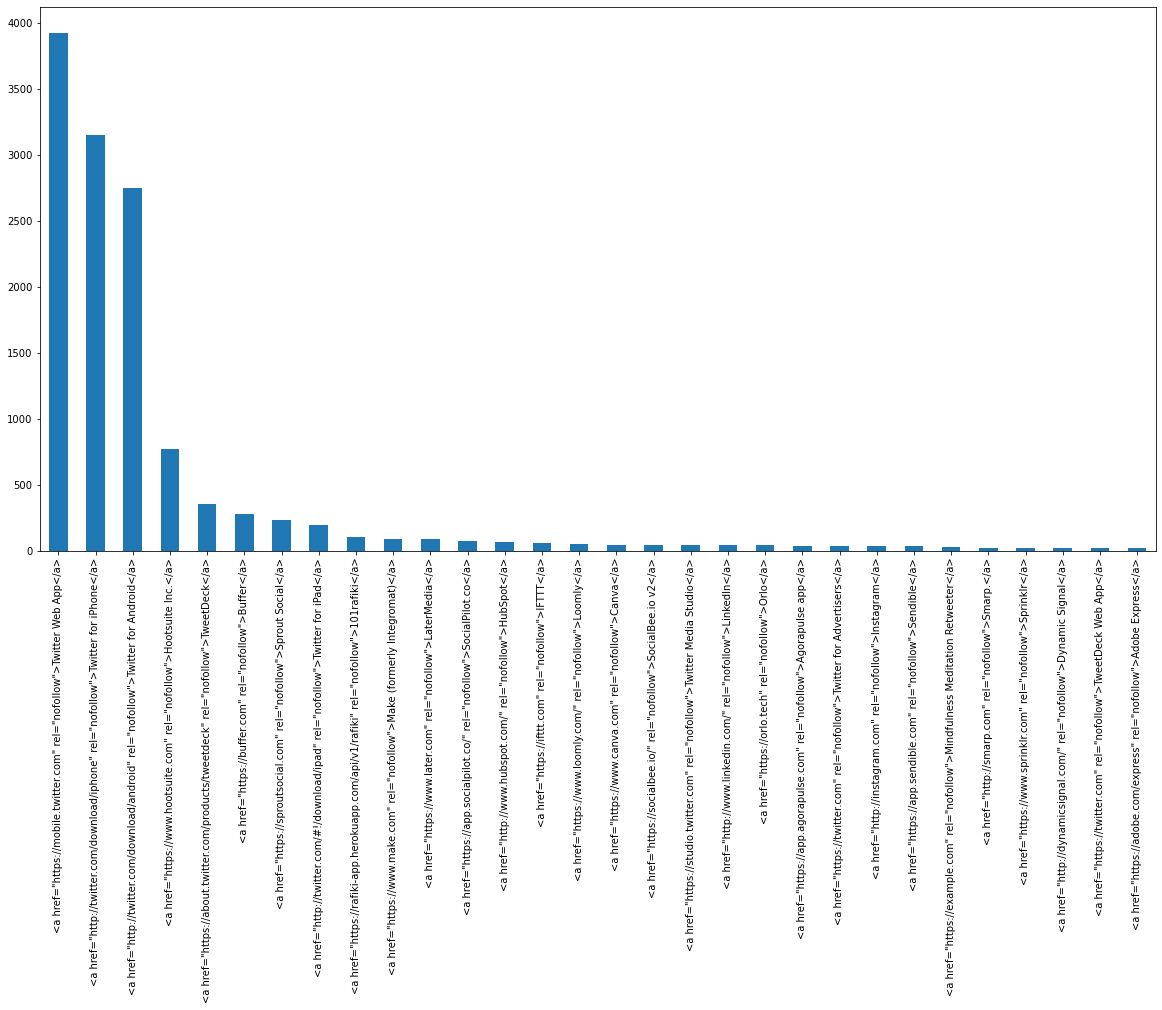

In [116]:
plt.figure(figsize = (20,10))
df['source'].value_counts().nlargest(30).plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

In [117]:
!pip install neattext #NLP package for cleaning textual data and text preprocessing.

ERROR: Invalid requirement: '#NLP'


In [118]:
import neattext.functions as nfx

In [119]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [120]:
df['text'].iloc[0]

'Every breath, a breakthrough.\xa0In honor of\xa0#WorldMentalHealthDay I wanted to share\xa0the trailer for my documentary Selena Gomez: My Mind &amp; Me.\xa0November 4 on @AppleTVPlus https://t.co/h8bkDd9mmV https://t.co/2D4HixbCjL'

In [121]:
df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,quoted_status_permalink,quote_count,timestamp_ms,reply_count,filter_level,query,withheld_scope,withheld_copyright,withheld_in_countries,possibly_sensitive_appealable
0,2022-10-10 18:38:08,1.579459e+18,1579458762578198529,"Every breath, a breakthrough. In honor of #Wor...",False,195,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-10 23:47:04,1.579537e+18,1579536505881886720,@liamgallagher @TalkClubUK Im feeling good at...,False,147,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""http://twitter.com/download/iphone"" r...",1.579455e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-10-10 04:35:00,1.579247e+18,1579246579944460289,"This #WorldMentalHealthDay, recognize that men...",False,116,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""https://about.twitter.com/products/tw...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-10-11 13:09:37,1.579738e+18,1579738476291198977,RT @RingCentral: Today is RingCentrals quarte...,False,140,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""recent"", iso_language_code...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-10-11 13:09:36,1.579738e+18,1579738472788918273,RT @ftaw16_: A Tigrayan woman said that a sold...,False,139,"list(hashtags = list(text = NA, indices = list...","list(result_type = ""recent"", iso_language_code...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
df['text'].apply(nfx.extract_hashtags)

0                                  [#WorldMentalHealthDay]
1                                  [#WorldMentalHealthDay]
2                                 [#WorldMentalHealthDay,]
3                                 [#WorldMentalHealthDay.]
4                                                       []
                               ...                        
13622    [#raisinggreatkids, #parenting, #children, #me...
13623    [#CAMHS, #eatingdisorders, #parentchild, #fami...
13624    [#NationalNutritionWeek, #nationalnutritionwee...
13625           [#à®¤à¯à®à®¿à®¯, #NationalNutritionWeek]
13626    [#NationalNutritionWeek, #healthylifestyle, #H...
Name: text, Length: 13627, dtype: object

In [123]:
df['extracted_hashtags'] = df['text'].apply(nfx.extract_hashtags)

In [124]:
df['extracted_hashtags']

0                                  [#WorldMentalHealthDay]
1                                  [#WorldMentalHealthDay]
2                                 [#WorldMentalHealthDay,]
3                                 [#WorldMentalHealthDay.]
4                                                       []
                               ...                        
13622    [#raisinggreatkids, #parenting, #children, #me...
13623    [#CAMHS, #eatingdisorders, #parentchild, #fami...
13624    [#NationalNutritionWeek, #nationalnutritionwee...
13625           [#à®¤à¯à®à®¿à®¯, #NationalNutritionWeek]
13626    [#NationalNutritionWeek, #healthylifestyle, #H...
Name: extracted_hashtags, Length: 13627, dtype: object

In [125]:
df['clean_tweet'] = df['text'].apply(nfx.remove_hashtags)

In [126]:
df[['text','clean_tweet']]

,text,clean_tweet
0,"Every breath, a breakthrough. In honor of #Wor...","Every breath, a breakthrough. In honor of I ..."
1,@liamgallagher @TalkClubUK Im feeling good at...,@liamgallagher @TalkClubUK Im feeling good at...
2,"This #WorldMentalHealthDay, recognize that men...",This recognize that mental health is as impo...
3,RT @RingCentral: Today is RingCentrals quarte...,RT @RingCentral: Today is RingCentrals quarte...
4,RT @ftaw16_: A Tigrayan woman said that a sold...,RT @ftaw16_: A Tigrayan woman said that a sold...
...,...,...
13622,Join me in my free workshop to learn more: \n...,Join me in my free workshop to learn more: \n...
13623,Slots available for next week. \n\nContact us ...,Slots available for next week. \n\nContact us ...
13624,National Nutrition Week 2022: à®¤à¯à®à®¿à®¯ ...,National Nutrition Week 2022: à®¤à¯à®à®¿à®¯ ...
13625,#à®¤à¯à®à®¿à®¯ à®à®à¯à®à®à¯à®à®¤à¯à®...,à®à®à¯à®à®à¯à®à®¤à¯à®¤à¯ à®µà®¾à®°à...


In [127]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : nfx.remove_userhandles(x))

In [128]:
df[['text','clean_tweet']]

,text,clean_tweet
0,"Every breath, a breakthrough. In honor of #Wor...","Every breath, a breakthrough. In honor of I ..."
1,@liamgallagher @TalkClubUK Im feeling good at...,"Im feeling good at the moment, 8/10. Agre..."
2,"This #WorldMentalHealthDay, recognize that men...",This recognize that mental health is as impo...
3,RT @RingCentral: Today is RingCentrals quarte...,RT Today is RingCentrals quarterly CaRing D...
4,RT @ftaw16_: A Tigrayan woman said that a sold...,RT A Tigrayan woman said that a soldier and ...
...,...,...
13622,Join me in my free workshop to learn more: \n...,Join me in my free workshop to learn more: \n...
13623,Slots available for next week. \n\nContact us ...,Slots available for next week. \n\nContact us ...
13624,National Nutrition Week 2022: à®¤à¯à®à®¿à®¯ ...,National Nutrition Week 2022: à®¤à¯à®à®¿à®¯ ...
13625,#à®¤à¯à®à®¿à®¯ à®à®à¯à®à®à¯à®à®¤à¯à®...,à®à®à¯à®à®à¯à®à®¤à¯à®¤à¯ à®µà®¾à®°à...


In [129]:
df['clean_tweet'].iloc[10]

"RT   This World Mental Health Day, let's create awareness and be compassionate towards people facing mental health issues. It i\x85"

In [130]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [131]:
df['clean_tweet'].iloc[10]

"RT This World Mental Health Day, let's create awareness and be compassionate towards people facing mental health issues. It i\x85"

In [132]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

In [133]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)

In [134]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_numbers)

In [135]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_stopwords)

In [136]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_shortwords)

## SENTIMENTAL ANALYSIS

In [137]:
!pip install textblob #TextBlob is a python library for processing text-based information.

ERROR: Invalid requirement: '#TextBlob'


In [138]:
from textblob import TextBlob

In [139]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'Polarity':sentiment_polarity,'Subjectivity':sentiment_subjectivity,'Sentiment':sentiment_label}
    return result

In [140]:
exl = df['clean_tweet'].iloc[15]

In [141]:
get_sentiment(exl)

{'Polarity': -0.05, 'Subjectivity': 0.1, 'Sentiment': 'Negative'}

In [142]:
df['sentiment_results'] = df['clean_tweet'].apply(get_sentiment)

In [143]:
df['sentiment_results']

0        {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
1        {'Polarity': 0.7, 'Subjectivity': 0.6000000000...
2        {'Polarity': 0.10000000000000002, 'Subjectivit...
3        {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
4        {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
                               ...                        
13622    {'Polarity': 0.45, 'Subjectivity': 0.65, 'Sent...
13623    {'Polarity': 0.4, 'Subjectivity': 0.4, 'Sentim...
13624    {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
13625    {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
13626    {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
Name: sentiment_results, Length: 13627, dtype: object

In [144]:
df['sentiment_results'].iloc[10]

{'Polarity': -0.1, 'Subjectivity': 0.2, 'Sentiment': 'Negative'}

In [145]:
pd.json_normalize(df['sentiment_results'].iloc[10])

,Polarity,Subjectivity,Sentiment
0,-0.1,0.2,Negative


In [146]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [147]:
df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,withheld_scope,withheld_copyright,withheld_in_countries,possibly_sensitive_appealable,extracted_hashtags,clean_tweet,sentiment_results,Polarity,Subjectivity,Sentiment
0,2022-10-10 18:38:08,1.579459e+18,1579458762578198529,"Every breath, a breakthrough. In honor of #Wor...",False,195,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,[#WorldMentalHealthDay],breath breakthrough honor wanted share trailer...,"{'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...",0.0,0.000000,Neutral
1,2022-10-10 23:47:04,1.579537e+18,1579536505881886720,@liamgallagher @TalkClubUK Im feeling good at...,False,147,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""http://twitter.com/download/iphone"" r...",1.579455e+18,...,NaN,NaN,NaN,NaN,[#WorldMentalHealthDay],feeling good moment Agree good talk Hope alright,"{'Polarity': 0.7, 'Subjectivity': 0.6000000000...",0.7,0.600000,Positive
2,2022-10-10 04:35:00,1.579247e+18,1579246579944460289,"This #WorldMentalHealthDay, recognize that men...",False,116,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""https://about.twitter.com/products/tw...",NaN,...,NaN,NaN,NaN,NaN,"[#WorldMentalHealthDay,]",recognize mental health important physical hea...,"{'Polarity': 0.10000000000000002, 'Subjectivit...",0.1,0.447619,Positive
3,2022-10-11 13:09:37,1.579738e+18,1579738476291198977,RT @RingCentral: Today is RingCentrals quarte...,False,140,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""recent"", iso_language_code...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,[#WorldMentalHealthDay.],Today RingCentral quarterly CaRing observance ...,"{'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...",0.0,0.000000,Neutral
4,2022-10-11 13:09:36,1.579738e+18,1579738472788918273,RT @ftaw16_: A Tigrayan woman said that a sold...,False,139,"list(hashtags = list(text = NA, indices = list...","list(result_type = ""recent"", iso_language_code...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,[],Tigrayan woman said soldier civilians gang rap...,"{'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...",0.0,0.000000,Neutral


In [148]:
df['Sentiment'].value_counts()

Positive    5988
Neutral     4376
Negative    3263
Name: Sentiment, dtype: int64

<AxesSubplot:>

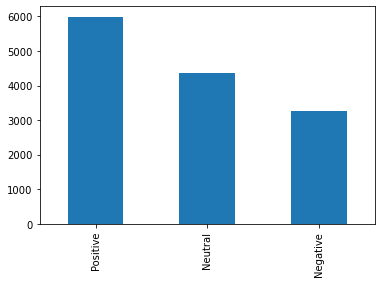

In [149]:
df['Sentiment'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

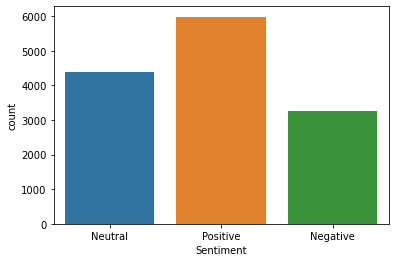

In [150]:
sns.countplot(df['Sentiment'])

In [151]:
positive_tweet = df[df['Sentiment'] == 'Positive']['clean_tweet']

In [152]:
negative_tweet = df[df['Sentiment'] == 'Negative']['clean_tweet']

In [153]:
neutral_tweet = df[df['Sentiment'] == 'Neutral']['clean_tweet']

In [154]:
positive_tweet

1         feeling good moment Agree good talk Hope alright
2        recognize mental health important physical hea...
5          mental health priority list hope doin okay alon
6              important treat kindness Getty harrysenigma
9                                               Hope great
                               ...                        
13617    CHALLENGEð Come join complete days wellness ch...
13618                           perfect order loved valued
13621                           Join live Facebook October
13622    Join free workshop learn more learn visit YouT...
13623    Slots available week Contact child looking sup...
Name: clean_tweet, Length: 5988, dtype: object

In [155]:
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()

In [156]:
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [157]:
positive_tweet_list

['feeling good moment Agree good talk Hope alright',
 'recognize mental health important physical health care',
 'mental health priority list hope doin okay alon',
 'important treat kindness Getty harrysenigma',
 'Hope great',
 'Engineering exteriority engineering interiority like cart horse best cart',
 'months asked started freelance writing created simple thread understand epic journey',
 'Today important hope kinder hope reme',
 'Hands glad platitudes stop real improvement work started hands thinks actually happen',
 'important highlight carers meet friend walk feel mental health',
 'Evening Trees informers time twinkles evening called precious sons Serenity',
 'Talk Listen Support Today important remember noones',
 'Wise words Yoongi',
 'Thanks',
 'Addressing mental health concerns right time help advocating Driving conversations',
 'Mental health important physical health fact hand hand',
 'feeling good moment Agree good talk Hope',
 'address mental health pple living affected le

In [158]:
negative_tweet_list

['trees improves mental wellbeing',
 'World Mental Health lets create awareness compassionate people facing mental health issues',
 'honour reminder need prioritise mental wellbeing actively restore',
 'World Mental Health checking ambassador Nick whos circumnavigating Scotland kayak Nicks',
 'lets fight guarantees universal mental health support Lets fight',
 'yesterday WMHD Completed weeks Alcohol raise money Raised total raised total Mental Health National Mental Health Champion Tournament',
 'Society rise prejudice mental health support struggling silently walk',
 'likes bang hint irony taking responsibility actually backing calling fucked forgive forget',
 'celebrate allow share photo late pursue',
 'grace forgive mistakes release regrets care time aside week',
 'need prioritise mental health days year',
 'According poses severe risks peoples mental health wellbeing',
 'Music Minds Matter charity created support people music industry suffer mental',
 'game winner Kyle Wright story

In [159]:
neutral_tweet_list

['breath breakthrough honor wanted share trailer documentary Selena Gomez Mind November',
 'Today RingCentral quarterly CaRing observance encourage employees',
 'Tigrayan woman said soldier civilians gang raped months spoke said',
 'offering wellbeing advice selfcare mindfulness compensate deva',
 'read moving blog post volunteer Nhlalala Baloyi pulling demons',
 'conversation starts question Working wanted',
 'time talked whats mind Opening struggles trust',
 'depression looks like',
 'said',
 'Thats Embarrassing',
 'Robin Williams',
 'pastor point periodically mention sermons seasons counseling therapist',
 'Richards wife died spiralled depression Hearing Dillon helped reconnect world',
 'James Brown Influential Phyna',
 'congenital heart disease doesnt affect physical health share spread',
 'today quotes speaking througho',
 'stay fighting',
 'known Twinkles Evening Evening Trees Evening Lights Moons Night Lighter Ufasar',
 'Serenity peace grow come blue indigo purple time fall ufah

In [160]:
for line in positive_tweet_list:
    #print(line)
    for token in line.split():
        print(token)

feeling
good
moment
Agree
good
talk
Hope
alright
recognize
mental
health
important
physical
health
care
mental
health
priority
list
hope
doin
okay
alon
important
treat
kindness
Getty
harrysenigma
Hope
great
Engineering
exteriority
engineering
interiority
like
cart
horse
best
cart
months
asked
started
freelance
writing
created
simple
thread
understand
epic
journey
Today
important
hope
kinder
hope
reme
Hands
glad
platitudes
stop
real
improvement
work
started
hands
thinks
actually
happen
important
highlight
carers
meet
friend
walk
feel
mental
health
Evening
Trees
informers
time
twinkles
evening
called
precious
sons
Serenity
Talk
Listen
Support
Today
important
remember
noones
Wise
words
Yoongi
Thanks
Addressing
mental
health
concerns
right
time
help
advocating
Driving
conversations
Mental
health
important
physical
health
fact
hand
hand
feeling
good
moment
Agree
good
talk
Hope
address
mental
health
pple
living
affected
lets
ensure
safe
place
talk
Ensure
access
services
pple
mental
health
is

October
wear
yellow
young
people
feel
matters
Lets
purpose
create
safe
communities
mentally
healthy
starts
mental
health
priority
happiness
essential
selfcare
necessity
mental
health
advantages
Endorphins
released
exercise
acting
stress
reliever
leaving
feeling
pleased
content
Schedule
appointment
Delighted
share
mint
collab
Title
Eldritch
Brain
Cost
Gift
workplace
power
hour
mental
wellbeing
World
Mental
Health
Working
strong
mental
health
trailer
Click
purchase
Health
come
medicine
time
comes
peace
mind
peace
heart
peace
soul
comes
laughter
love
talking
mental
health
right
wellbeing
comes
like
talk
touch
October
World
Mental
Health
year
focusing
importance
making
mental
health
priority
Join
teacher
Shira
Appell
special
live
meditation
hope
tomorrow
Getting
ready
lives
lovelier
discover
hardships
break
rest
Happy
World
Mental
Health
Follow
posts
like
important
time
indulge
self
care
relax
Monday
October
strongly
encourage
sure
health
social
care
colleagues
Experts
underline
need
psych

feel
matters
Tomorrow
World
Mental
Health
October
thought
special
opportunity
inform
support
services
offer
find
Tomorrow
World
Mental
Health
Learn
mindfulness
improve
mental
health
paying
close
attention
focused
moment
ease
tension
better
decisions
methods
work
diagnosis
multiple
sclerosis
huge
impact
mental
health
MSUK
Mondays
help
provide
helpful
information
insight
Follow
social
media
pages
stay
updated
Volunteer
good
Todays
activity
mental
health
calendar
Simply
superb
Perfectly
timed
talking
mental
health
right
wellbeing
comes
talk
touch
national
mental
health
survey
conducted
Centre
shows
happiness
commonly
experienced
emotion
Tomorrow
taking
amazing
youthled
event
Come
hello
social
action
activity
weve
planned
national
mental
health
survey
conducted
Centre
shows
happiness
commonly
experienced
emotions
students
decline
moving
higher
grades
tomorrow
helps
manage
anxiety
Employment
precisely
bullying
culture
work
major
cause
misery
preparation
wanted
reshare
important
focus
Anxiet

activities
ball
hope
thrilled
stake
holders
departments
Panelists
lead
amaz
days
preparing
kindly
informing
venue
Ahhhh
Thanks
October
world
mental
health
active
involved
positive
impact
mental
health
Feel
benefits
exercise
joining
FREE
session
Register
visit
today
mind
body
Connect
body
music
resonates
Movements
small
light
breathing
moving
fingertips
rigorous
want
Bring
best
flashmob
danceathon
game
Monday
City
Hall
transition
afternoon
evening
sessions
live
Step
campaign
advance
consider
prioritize
mental
health
ways
help
maintain
healthy
headspace
launching
chatbot
function
UReport
channel
aimed
helping
young
peop
Great
week
Cracking
content
welcoming
staff
Listen
features
Monday
breakfast
Virtual
October
Free
consultation
checkup
IPSE
offering
members
free
consultations
wellbeing
checkups
details
Leading
want
emphasize
importance
providing
mental
health
services
need
REACH
team
members
provide
support
shelters
region
Mobile
Health
Clinic
Learn
hour
time
Good
advice
given
needed
Me

yoga
Zumba
involved
Peer
Outreach
Team
working
young
Londoners
organise
wellbeing
festival
young
people
aged
Monday
Read
spaces
available
journaling
workshop
Monday
October
Playing
Looking
Love
Kofi
Harris
Saturday
hosting
FREE
event
Help
raise
awareness
Playing
Looking
Love
Kofi
Harris
Monday
October
chance
tackle
important
talk
things
help
struggling
Visit
list
World
Mental
Health
resources
Playing
Love
Vigilantes
Order
Monday
October
marks
opportunity
highlight
impact
mental
health
challenges
live
humanitarian
emergencies
Loving
selfies
Share
chance
free
ticket
raise
awareness
bias
mental
health
wellbeing
global
priority
Leading
highlighting
support
available
sharing
advice
year
created
great
guide
based
research
found
spreading
little
happiness
World
Mental
Health
Global
collaborations
conversations
crucial
advancing
good
mental
health
Thanks
join
GMHANs
monthly
webinars
Watch
GMHAN
webinar
Join
webinar
feel
like
accept
fully
exactly
right
Learn
quiet
inner
critic
stands
teacher
Gr

participants
raise
awareness
issues
Monday
October
join
FREE
EcoNIDRA
session
permission
latest
Health
Wellbeing
survey
showed
automotive
people
issues
managing
mental
Join
unique
free
event
happening
North
Somerset
bring
employers
employee
seen
heads
better
dealing
mental
health
problem
Kate
Middleton
Mental
Health
Matters
online
event
Join
Monday
special
online
meeting
disc
supporting
launching
videos
easy
bitesized
tips
help
deal
stress
anxiety
boost
mood
sleep
better
feel
control
Change
inevitable
exciting
time
loss
uncertainty
fear
upcoming
session
support
staff
thinking
personal
emotions
responses
change
Mental
Health
Matters
online
event
Join
Monday
special
online
meeting
discussing
mental
health
matters
continue
work
supporting
mental
health
welcome
Register
today
Cute
little
pocketsize
hardback
book
useful
including
kids
book
school
library
Colourful
Uplifting
Quotes
Advice
Exercises
little
book
Review
Monday
official
campaign
Mind
Matters
focuses
small
things
kind
minds
Welco

website
think
better
spend
wonderful
folk
Celebrate
World
Mental
Health
best
possible
holding
Cosy
Campus
line
week
safe
relaxed
space
students
Looking
speak
parents
experiences
children
mental
health
support
available
scho
October
October
Check
strong
friends
Check
effortlessly
cool
friends
habit
people
better
texting
value
traits
presence
life
told
problem
shared
problem
halved
truth
problem
overshared
problem
multiplied
Read
late
article
find
commemorated
year
understands
importance
physical
Check
testimonial
experts
sharing
views
significance
mental
health
healthy
mind
Powerful
Stay
tuned
Confidential
Podcast
Looking
speak
parents
experiences
children
mental
health
support
available
schools
positive
negative
open
yasminwakefield
better
start
week
Mindful
Guide
bestknown
paintings
Come
better
start
week
Mindful
Guide
bestknown
paintings
Come
Monday
October
offering
free
audio
guides
Looking
forward
guest
speaker
tomorrow
World
Mental
Health
Cork
students
Great
initiativ
Monday
Octob

Health
Cork
students
Great
initiative
Cork
Mental
Health
Foundation
Ireland
mental
health
physical
health
equally
important
feel
treated
equally
important
health
service
striking
finding
emerging
country
study
ahead
LOVE
mention
wonderful
freebie
time
know
interested
press
education
shout
love
kids
schools
possible
downloading
month
Memo
asking
join
Castelnau
Community
Centre
therapist
interested
working
young
people
voluntary
basis
Read
Subscribe
Join
online
lecture
Picture
mind
Mental
Health
Wellbeing
Writings
Robert
Burns
mark
Book
free
host
series
events
focusing
positive
effect
exercise
Mindfulness
Yoga
Discussion
Group
Lifestyles
team
Conditioning
class
Book
mywellness
Free
hand
massages
file
polish
dropin
sessions
today
provided
Beauty
Therapy
students
approaches
special
episode
shares
transforming
therapy
treatments
comes
tells
Spotify
CALLING
Theres
time
sign
students
free
live
tours
Kooth
website
week
October
link
sign
easy
feel
powerless
life
aspects
life
manage
Join
special

proud
build
awareness
individual
like
Peter
join
Access
Areas
festival
Londons
City
Hall
bringing
best
young
poetry
spoken
word
panel
discussions
conversations
workshops
Register
FREE
October
coincide
inviting
organisations
industries
come
join
touching
million
lives
Find
organisation
involved
October
coincide
inviting
organisations
industries
come
join
touching
million
lives
Find
organisation
involved
October
coincide
inviting
organisations
industries
come
join
touching
million
lives
Find
organisation
involved
honor
invited
Alex
Elle
Nedra
Glover
Tawwab
lead
thoughtprovoking
discussion
Uncover
refreshing
advice
protect
improve
mental
health
selfcare
setting
boundaries
Medical
Practitioners
susceptible
challenges
professional
journalists
working
pieces
need
comments
topics
features
feel
free
drop
happy
chat
CISWP
excited
launch
Supporting
Employee
Mental
Health
Wellbeing
fully
online
selfdirected
Celebration
World
Mental
Health
Hadley
Community
centre
High
Street
Hadley
Telford
Wednesd

focused
important
role
data
time
week
commemorating
World
Mental
Health
know
going
sure
share
things
feel
overwhelming
embracing
whats
power
support
mental
health
Thats
October
asking
mental
health
Number
priority
Find
event
Agriculture
Building
Foyer
October
ampm
Learn
support
available
activities
meet
therapy
wellbeing
animals
Questions
ready
Sinead
Youth
Wellbeing
Specialist
qualified
counsellor
Stuart
Crisis
Lead
mental
health
awareness
week
begins
love
hear
views
workplace
support
mental
health
Monday
October
AdvanceHE
running
free
webinar
titled
Mental
Health
Wellbeing
Minds
Matter
Teams
Monday
October
Register
Join
gtgt
week
World
Mental
Health
release
song
Best
Kept
Secret
preorder
commemorated
year
understand
importance
physical
Check
testimonial
experts
sharing
views
significance
mental
health
healthy
mind
Forget
decent
pension
webinar
financial
stress
week
people
lives
suicides
male
like
overwhelming
majority
truck
drivers
good
promote
openness
monitor
wellbeing
workplace
he

wellness
mind
body
spirit
environment
education
experiences
community
Mental
health
wellness
important
conversations
ones
BREAKING
PODCAST
OFFICIALLY
sibling
child
parent
loved
struggle
profound
impact
selfish
focus
happiness
becâ
children
aged
younger
benefit
screening
primary
care
editorial
published
delighted
working
joint
symposium
Wales
Canada
Witching
Hour
Awake
Aware
Away
stop
blistering
thoughts
seaping
Hear
great
tips
fabulous
Claire
Hooper
look
mental
health
Australia
important
strong
Thanks
Tweety
life
story
chapter
happening
realtime
donâ
perfect
Accepting
positive
negative
helps
improve
emotional
wellbeing
latest
blog
post
Schizophrenia
SelfCare
Looks
Like
Neuroscientist
Rein
explains
strange
phenomenon
hallucinating
edge
consciousness
Learn
Friday
year
anniversary
lost
friend
suicide
kind
introduced
amazing
anime
definitâ
latest
blog
post
Schizophrenia
SelfCare
Looks
Like
Hope
great
Longer
parental
leave
confer
benefits
women
particular
disadvantaged
backgrounds
Scot
need

gentle
people
broken
kindness
help
feel
excited
present
panel
discussion
Mental
Health
Substance
Disorders
Join
Thursday
Pediatric
Associates
proud
support
Sound
Alarm
Kids
fight
kids
mental
health
crisis
isnâ
prepared
life
like
outside
locker
room
crucial
life
long
success
Kids
doesnt
exist
vacuum
relies
healthy
households
communities
policy
crafted
holistically
prevention
early
intervention
mind
Thank
hosting
briefing
Congress
close
gaps
Blackberry
Flavor
Edibles
great
tasting
food
grade
certified
nonGMO
GRAS
gluten
free
vegan
Sunday
November
team
walking
fundraising
behalf
support
children
young
people
adults
year
Donate
moment
reflect
week
reflect
brains
important
urgent
forms
harm
brains
documented
brain
scans
best
treat
depression
link
method
improve
effectiveness
relationship
skills
Maintaining
relationships
lives
important
necessary
Loving
weeks
Great
message
Mental
health
Priority
Join
FREE
Telegram
channel
text
admin
FREEâ
Free
Access
Premium
Channel
DAYS
Click
Seeking
profes

employees
journey
physical
Email
training
Starting
panel
discussion
Nkabom
wonderful
panel
joining
globe
read
generously
brave
article
Knowing
languages
hard
remember
strong
handle
things
life
throws
capable
YOUâ
week
opportunities
best
START
BOOK
gladly
help
Contact
comment
Choose
forgiveness
spend
energy
worrying
people
think
person
said
losing
focus
person
mirror
needs
self
love
self
careâ
subconscious
mind
good
mimicking
repeatedly
observing
people
persona
favorite
characters
prolonged
observation
Simple
things
bring
great
looking
forward
chapter
compelling
work
youth
education
treatment
services
available
need
regardless
world
live
proud
advocacy
voice
results
suggested
healthy
eating
avoiding
stressful
news
drinking
water
staying
outdoors
taking
relaxing
activities
showed
protective
effect
mental
health
stressful
period
Americaâ
costly
illnesses
costs
global
economy
risen
main
problemâ
Michelle
Lilly
providing
opening
Keynote
address
conference
Coeur
Alene
Engaging
conversation
w

benefit
learning
better
coping
strategies
regulate
parity
land
real
question
enforce
woman
able
leave
abusive
home
leaves
scars
visible
Trauma
costs
kind
cost
life
Choose
kind
good
StuartSmith
gardening
BREAK
STIGMA
Join
evening
free
Mental
Health
Awareness
session
partnership
starting
team
kindly
given
food
drink
voucher
Mind
fundraiser
prize
package
celebrated
week
cake
flowers
toffee
apples
grown
noshed
right
farm
board
Trustees
effort
promote
health
equal
access
care
complete
focus
making
diversity
health
wellness
priority
help
wonderful
guidance
counselor
want
difference
someoneâ
life
Learn
action
fight
stop
suicide
Learn
positive
vibes
Join
quest
improve
worldâ
Struggling
mental
health
better
talk
youre
feeling
wait
Theres
lots
good
days
days
reality
days
figure
going
opportunity
turn
good
good
great
Causes
Restless
Syndrome
evaluate
treat
child
adult
sleep
disorders
Nashville
proud
working
incredible
team
visited
today
cant
tell
thought
entering
politics
experience
life
professi

true
Wise
dont
need
prove
point
need
prove
point
arent
wise
LaoTzu
Ching
Interested
monitors
reach
impact
student
initiatives
Illinois
RCCâ
Love
exhibition
wonderful
engaged
issues
lockdown
vaccines
expressed
time
till
sure
check
wonderful
cultural
sessionsð
matterð
Today
spoke
bravely
suicide
brother
TariqTomorrow
family
bury
sisterâ
deaâ
sale
October
Ships
early
November
profits
posted
door
Mini
Mentalmates
Absolutely
love
certainly
smileâ
amazing
design
important
line
managers
receive
mental
health
training
spot
signs
symptoms
colleague
experiencing
mental
health
guide
support
help
visit
Heres
simple
remind
important
friends
life
Commissioner
todays
October
celebrated
wearing
green
ribbon
today
raise
awareness
sure
donâ
forget
Thanks
Richard
Whitelock
Julie
White
Kalpesh
Nakeshree
brilliant
morning
Joint
Employer
Solutions
event
Went
today
Wasnt
feeling
particularly
motivated
thats
discipline
comes
great
time
Good
Extreme
Anxiety
Right
BiPolar
Medication
Latuda
Days
Today
selfcare
l

schedule
appointment
Read
Trauma
Awarenessâ
relation
adverse
childhood
experiences
familiar
concept
public
large
largest
environment
redesign
project
seeking
improve
workforce
worsened
cause
mainly
situated
organisation
work
Prof
Walter
Sermeus
Meet
inspiring
speakers
Register
Today
Lets
conversation
alive
shine
light
support
options
available
improving
health
wellbeing
good
finally
meet
team
face
face
THANK
support
excited
AcessAble
journey
coming
years
improve
access
experience
services
published
Mindfulness
benefits
mindfulness
activities
find
calm
fortunate
career
time
health
required
step
life
moreâ
Publish
Research
Fast
Peer
Review
Annual
Dementia
Congress
Vienna
Austria
Submit
abstract
finished
free
mindfulness
course
Awesome
ladies
great
time
learned
lots
practiced
mindful
practices
know
spend
hours
average
week
means
equally
important
nurture
healthy
environment
campus
like
home
Heres
schools
students
Beckie
joining
Talent
Growth
live
event
tomorrow
speakerð
proud
supporting
A

Transformation
community
services
include
¹increasing
access
¹reducing
waiting
times
¹improving
quality
care
¹embedding
approach
advancing
equalities
youre
adult
need
emotional
wellbeing
support
find
free
safe
anonymous
support
Qwell
Young
people
care
likely
face
unemployment
homelessness
problems
Help
raise
awareness
National
Leaving
Care
Week
October
days
know
young
people
ongoing
issues
experience
loss
care
year
transiâ
ready
meet
Brent
residents
Brent
Civic
Centre
partner
good
step
Letâ
hope
patientsâ
voices
included
creation
initiatives
mentioned
health
respect
head
shoulders
suffered
teenage
years
depression
real
okay
Okay
progress
good
progress
image
Yesterday
belatedly
celebrated
World
Mental
Health
lunchtime
sharing
session
quiz
advice
wellbeingrelated
additions
communal
bookshelf
mindful
doodle
tree
Lots
useful
advice
powerful
stories
shared
Huge
respect
sharing
story
relating
struggles
cant
stress
important
Things
change
blink
little
trying
impact
Nigeria
world
large
going
A

November
Week
Opportunity
Social
Worker
Texas
Lucid
Lane
heard
love
languages
know
think
need
listen
episode
Things
tough
moment
especially
workplacemuch
centres
money
good
time
consider
financial
wellbeing
talk
staff
news
Wellness
work
financial
talks
Lets
support
young
peoples
mental
healthð
proud
reveal
Peace
Mind
Kids
Package
children
Safe
Thanks
list
ways
help
people
hard
time
right
Tomorrow
second
excited
join
tomorrow
discussion
Posted
Social
Worker
Texas
Lucid
Lane
Today
World
Menopause
billion
women
worldwide
experience
menopause
menopause
training
education
managing
people
normal
global
level
Sheâ
fine
Sheâ
smiling
happy
Sheâ
makeup
sheâ
okay
Sheâ
doesnâ
look
like
wrong
mental
health
look
like
Donâ
judge
book
cover
Fresh
Social
Worker
Texas
Lucid
Lane
Following
week
Country
Director
Alan
Muirhead
speaks
latest
insight
needs
global
priority
Read
Effective
Ways
Stop
Taking
Things
Personally
Life
Calm
Sage
habit
things
personallyWell
friend
youre
aloneI
know
highlights
quick
way

Kindly
PODCAST
Feel
Good
Yvette
Blowitz
RECLAIM
CREATIVE
LIFE
TooBusy
World
Rodsky
Author
Find
Unicorn
Space
donâ
need
things
order
worth
valuable
Today
fantastic
appointment
consultant
neurologist
neurophysiologist
National
Hospital
forâ
available
latest
seascapes
plus
pampp
Creating
meditative
refocus
youâ
like
Happy
Tuesday
coming
year
tend
experience
year
fatigue
burnout
covering
signs
look
order
ensure
find
totally
burnt
Tuesday
October
Join
Voices
team
Weekly
Instagram
Live
Discussions
Disparities
Healthcareâ
humanâ
kind
RIGHT
love
life
exciting
resource
Looking
forward
trying
resilience
assessment
worthy
overcome
care
important
captivating
lecture
legendary
Marie
sberg
talked
severity
results
effects
pandemic
containment
measures
general
population
published
Read
found
Feeling
better
blip
week
knew
thankful
support
walk
head
clear
Matt
Mental
Health
looking
talk
loved
talk
Sign
PsychX
today
great
offerð
start
recognising
Depression
entirety
realising
thereâ
help
losing
loved
one

better
rewarding
endU
affect
looking
forward
important
twopart
series
kicking
tonight
AEDT
proudly
support
series
alongside
RSVP
ordinary
reactions
seen
genuine
dangers
times
confronted
instability
obscure
typical
reasonable
individuals
encountering
fear
setting
pandemic
better
future
negative
defeated
attitude
Stop
tearing
learn
build
Speak
positively
feel
like
giving
feels
right
feels
worth
living
Dont
pass
phase
youre
recurring
intrusive
thoughts
suicide
seek
help
youâ
Suicidal
thoughts
going
mental
crisis
know
reach
numbers
Samaritans
Talk
Suicide
Canada
United
States
Crisis
Textline
Text
HOME
free
Navigating
lifes
challenges
emerge
healthy
woman
mentally
emotionally
know
students
come
Illuminate
Student
Summit
Wellness
enjoy
learning
Beautiful
Contradictionsâ
available
tough
moment
work
life
feel
overwhelming
listening
offload
relâ
takes
overcome
lifetime
conditioningâ
avoid
overexertion
feel
okay
spend
time
people
company
enjoy
look
mental
health
Australia
Breathe
consciously
bod

MINDS
INSIDE
STORY
inside
busiest
units
uncover
realities
meet
patients
staff
challenging
stigma
taboos
exist
Thanks
mate
life
story
chapter
happening
realtime
Youâ
invited
join
recognition
Breast
Cancer
Awareness
Month
excited
Annual
Pink
Table
Talk
calling
Congress
immediate
action
mitigate
crisis
facing
nationâ
youth
Join
tell
senators
cosponsor
Tomorrow
Round
Mental
Health
Monday
discussing
healing
sound
Happy
Tuesday
Whos
voice
hearð
food
bullets
bombs
kill
innocent
people
peacekeepers
Fall
love
path
deep
healing
suffer
anxiety
important
physician
ashamed
human
love
good
Doctors
Brussels
Prescribe
Visits
insecurities
depression
someones
face
happy
Mental
health
important
care
loved
ones
Loving
questions
dialogue
psychophysiology
yoga
mindfulness
research
mental
health
Great
poster
session
happening
proud
Lauren
honesty
vulnerability
passion
platform
good
know
wasnâ
easy
tonight
feels
Earthing
good
healtheffortless
cost
nothingits
easy
grounding
matsheet
pillow
homeno
need
buyð
Mas

steps
wellbeing
remind
important
kind
king
MEAN
includes
kind
Like
Turtles
LIVE
live
Sleep
needs
change
remains
crucial
physical
health
lack
cognitive
processing
children
increased
fall
risks
seniors
Read
latest
piece
importance
stage
life
Journal
added
shop
SPIRAL
NOTEBOOK
Pretty
Flower
Journal
Anxiety
Mental
Health
Emotional
Support
Major
Depressive
Disorder
todayâ
Booster
home
adding
response
feel
free
join
discussion
Thanks
Rowena
Mindset
Courage
comes
different
types
today
found
interesting
couldnt
bigger
Watching
right
Youre
best
watch
MSNBC
daily
Join
fascinating
talk
Register
FREE
scared
relationship
feel
like
mentally
ready
going
Strong
Mind
Wanna
Help
Fell
free
donate
solve
crisis
Australia
Join
webinar
explore
Better
Policy
Better
Mental
Health
Australia
October
Register
live
mental
illness
Watch
Sunday
thereâ
learnð
amPst
PARâ
Thank
making
space
welcome
dialogue
mental
health
care
obstacles
internal
external
need
speak
selfacknowledge
struggles
continuously
difference
succe

Monday
Theres
info
useful
Meet
Laura
Feeser
primary
therapist
Point
Wellness
Laura
Certified
Clinical
Trauma
Professional
CCTP
help
work
childhood
attachment
relationship
single
incident
trauma
Adopt
calm
disposition
Gateway
Feeling
happy
proud
reaching
service
users
beiâ
Parents
Teens
join
virtually
important
conversation
teen
Thank
hosting
Register
Special
Update
went
Monday
Theres
info
useful
youd
like
update
email
address
wont
added
supporters
list
Fighting
seen
challenging
things
harder
people
understand
Popular
Alcoholic
Family
Roles
Link
Thanks
Rionna
life
story
chapter
happening
realtime
Left
Wing
Wing
Coinciding
Mental
Health
Week
Cairns
Hospital
Grand
Rounds
included
presentation
Self
Compassion
teens
know
Kooth
Free
safe
anonymous
support
young
people
tell
find
Improving
cares
mental
health
thats
offer
unique
perk
help
employees
find
solutions
better
handle
stress
build
healthy
relationships
jese
therapists
kahan
miltay
hain
Idhar
overdosed
positivity
antidepressants
normal


In [161]:
pos_tokens = [token for line in positive_tweet_list  for token in line.split()]

In [162]:
neg_tokens = [token for line in negative_tweet_list  for token in line.split()]
neu_tokens = [token for line in neutral_tweet_list  for token in line.split()]

In [163]:
pos_tokens

['feeling',
 'good',
 'moment',
 'Agree',
 'good',
 'talk',
 'Hope',
 'alright',
 'recognize',
 'mental',
 'health',
 'important',
 'physical',
 'health',
 'care',
 'mental',
 'health',
 'priority',
 'list',
 'hope',
 'doin',
 'okay',
 'alon',
 'important',
 'treat',
 'kindness',
 'Getty',
 'harrysenigma',
 'Hope',
 'great',
 'Engineering',
 'exteriority',
 'engineering',
 'interiority',
 'like',
 'cart',
 'horse',
 'best',
 'cart',
 'months',
 'asked',
 'started',
 'freelance',
 'writing',
 'created',
 'simple',
 'thread',
 'understand',
 'epic',
 'journey',
 'Today',
 'important',
 'hope',
 'kinder',
 'hope',
 'reme',
 'Hands',
 'glad',
 'platitudes',
 'stop',
 'real',
 'improvement',
 'work',
 'started',
 'hands',
 'thinks',
 'actually',
 'happen',
 'important',
 'highlight',
 'carers',
 'meet',
 'friend',
 'walk',
 'feel',
 'mental',
 'health',
 'Evening',
 'Trees',
 'informers',
 'time',
 'twinkles',
 'evening',
 'called',
 'precious',
 'sons',
 'Serenity',
 'Talk',
 'Listen',
 'S

In [164]:
from collections import Counter

In [165]:
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = most_common
    return result

In [166]:
get_tokens(pos_tokens)

[('health', 1359),
 ('mental', 1282),
 ('Mental', 613),
 ('Health', 561),
 ('support', 502),
 ('October', 477),
 ('important', 436),
 ('help', 419),
 ('Monday', 419),
 ('people', 402),
 ('free', 350),
 ('Join', 335),
 ('wellbeing', 320),
 ('good', 319),
 ('time', 293),
 ('care', 267),
 ('great', 250),
 ('work', 249),
 ('today', 232),
 ('better', 231),
 ('World', 230),
 ('need', 221),
 ('week', 220),
 ('life', 218),
 ('know', 206),
 ('like', 205),
 ('feel', 188),
 ('event', 186),
 ('talk', 175),
 ('love', 171)]

In [167]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neu_words = get_tokens(neu_tokens)

In [169]:
df1 = pd.DataFrame(most_common_neg_words,columns=['words','scores'])
df1

,words,scores
0,mental,1738
1,health,1652
2,Mental,1049
3,Health,913
4,World,471
5,October,387
6,wellbeing,363
7,help,278
8,support,271
9,priority,266


In [170]:
A = neg_df[neg_df["words"].str.contains("mental") == False]
B = A[A["words"].str.contains("health") == False]
C = B[B["words"].str.contains("Mental") == False]
D = C[C["words"].str.contains("Health") == False]
E = D[D["words"].str.contains("Join") == False]
neg_df = E[E["words"].str.contains("Monday") == False]

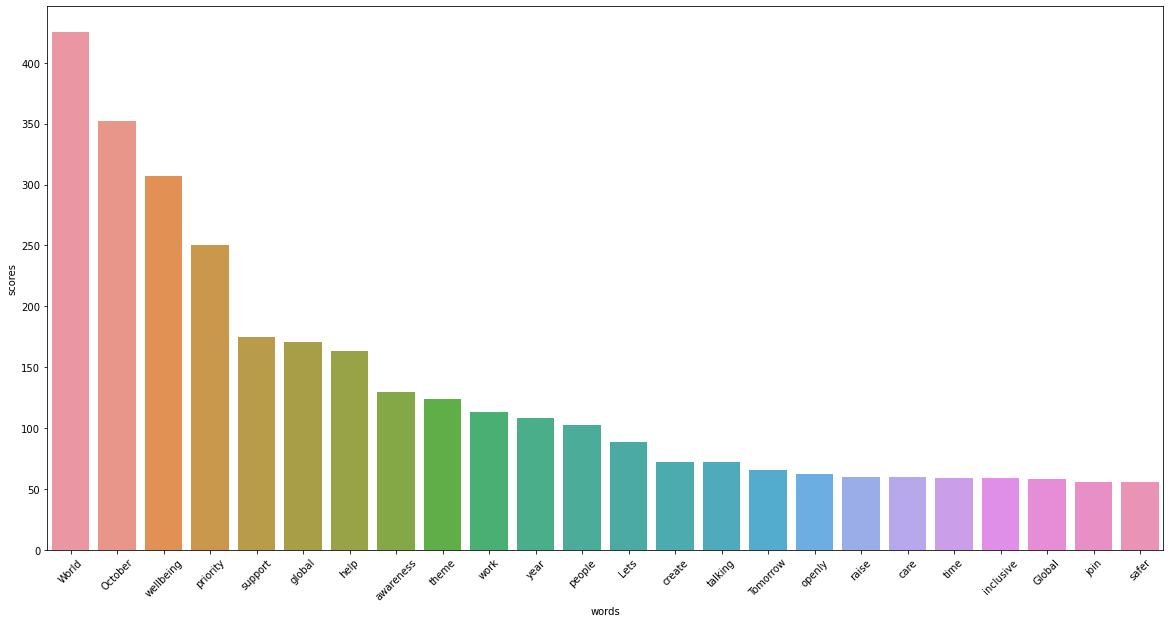

In [171]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'words',y = 'scores',data = neg_df)
plt.xticks(rotation = 45)
plt.show()

In [172]:
df2 = pd.DataFrame(most_common_pos_words,columns=['words','scores'])
df2

,words,scores
0,health,1359
1,mental,1282
2,Mental,613
3,Health,561
4,support,502
5,October,477
6,important,436
7,help,419
8,Monday,419
9,people,402


In [173]:
A = neg_df[neg_df["words"].str.contains("mental") == False]
B = A[A["words"].str.contains("health") == False]
C = B[B["words"].str.contains("Mental") == False]
D = C[C["words"].str.contains("Health") == False]
E = D[D["words"].str.contains("Join") == False]
F = E[E["words"].str.contains("Monday") == False]
G = E[E["words"].str.contains("October") == False]
pos_df = E[E["words"].str.contains("tomorrow") == False]

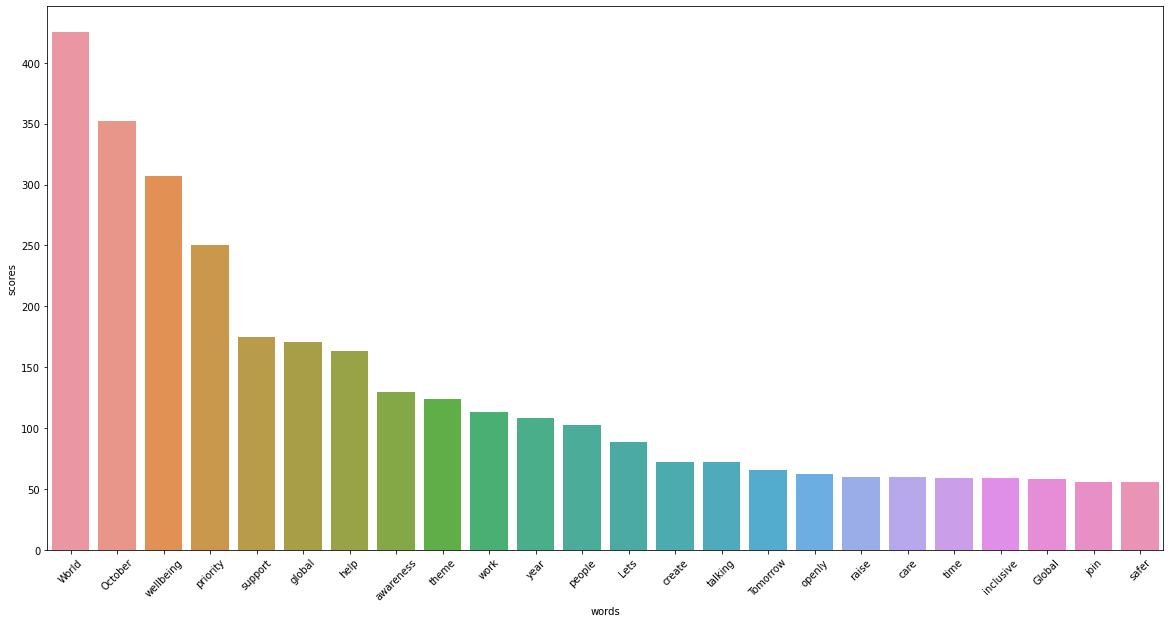

In [174]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'words',y = 'scores',data = pos_df)
plt.xticks(rotation = 45)
plt.show()

In [175]:
df3 = pd.DataFrame(most_common_pos_words,columns=['words','scores'])
df3

,words,scores
0,health,1359
1,mental,1282
2,Mental,613
3,Health,561
4,support,502
5,October,477
6,important,436
7,help,419
8,Monday,419
9,people,402


In [176]:
A = neg_df[neg_df["words"].str.contains("mental") == False]
B = A[A["words"].str.contains("health") == False]
C = B[B["words"].str.contains("Mental") == False]
D = C[C["words"].str.contains("Health") == False]
E = D[D["words"].str.contains("Join") == False]
F = E[E["words"].str.contains("Monday") == False]
G = E[E["words"].str.contains("October") == False]
neu_df = E[E["words"].str.contains("tomorrow") == False]

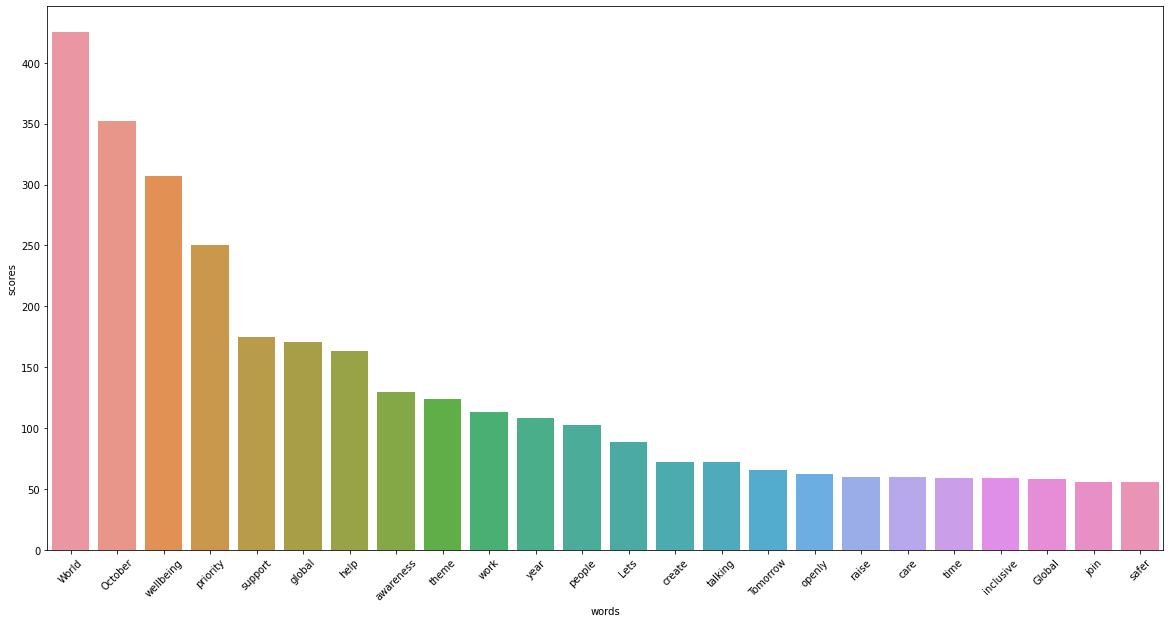

In [177]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'words',y = 'scores',data = neg_df)
plt.xticks(rotation = 45)
plt.show()

In [178]:
!pip install wordcloud

In [179]:
from wordcloud import WordCloud

In [180]:
def plot_wordcloud(docx):
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

In [181]:
pos_docx = ' '.join(pos_tokens)

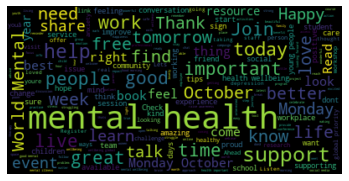

In [182]:
plot_wordcloud(pos_docx)

In [183]:
neg_docx = ' '.join(neg_tokens)

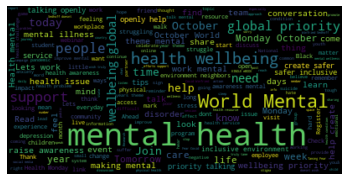

In [184]:
plot_wordcloud(neg_docx)

In [185]:
neu_docx = ' '.join(neu_tokens)

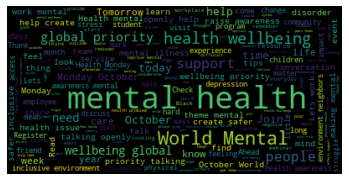

In [186]:
plot_wordcloud(neg_docx)